# 数据预处理

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
PassengerId = test['PassengerId']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
data_df = [train , test]
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.loc[: , ['Pclass' , 'Survived']].groupby('Survived').mean()

,Pclass
Survived,
0,2.531876
1,1.950292


In [7]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


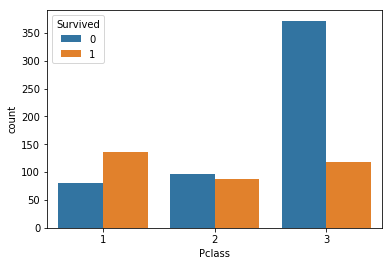

In [8]:
import seaborn as sns 
%matplotlib inline
sns.countplot(x = 'Pclass' , hue = 'Survived' ,data = train)

In [9]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

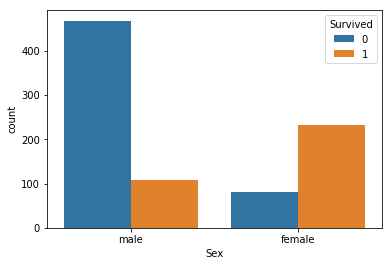

In [10]:
sns.countplot(x = 'Sex' , hue = 'Survived' ,data = train)

In [11]:
for dataset in data_df :
    dataset['Sex'] = dataset['Sex'].map({'male' : 1 , 'female' : -1})
train.loc[: , ['Sex' , 'Survived']].groupby('Survived').mean()

,Sex
Survived,
0,0.704918
1,-0.362573


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",-1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
for dataset in data_df :
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1


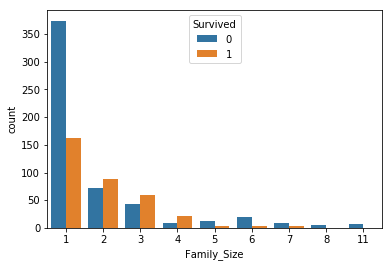

In [14]:
sns.countplot(x = 'Family_Size' , hue = 'Survived' ,data = train)

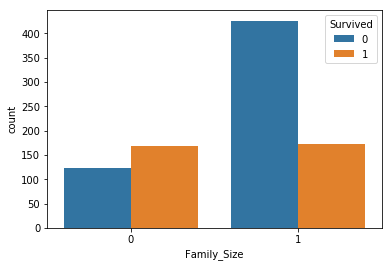

In [15]:
for dataset in data_df :
    dataset['Family_Size'] = dataset['Family_Size'].apply(lambda x : 0 if x == 2 or x == 3 or x == 4 else 1)
sns.countplot(x = 'Family_Size' , hue = 'Survived' ,data = train)

In [16]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

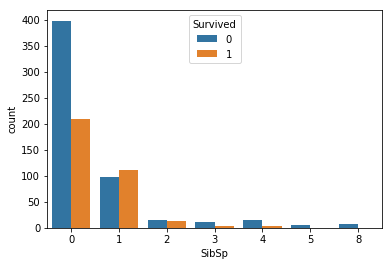

In [17]:
sns.countplot(x = 'SibSp' , hue = 'Survived' ,data = train)

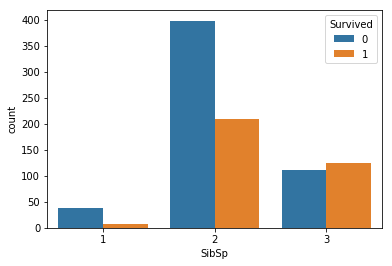

In [18]:
def sib(x) :
    if(x == 3 or x == 4 or x == 5 or x == 8):
        return 1
    elif(x == 0):
        return 2
    else :
        return 3
    
for dataset in data_df :
    dataset['SibSp'] = dataset['SibSp'].apply(sib)
sns.countplot(x = 'SibSp' , hue = 'Survived' ,data = train)

In [19]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

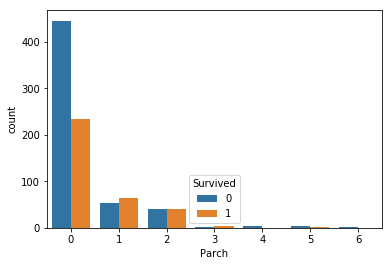

In [20]:
sns.countplot(x = 'Parch' , hue = 'Survived' ,data = train)

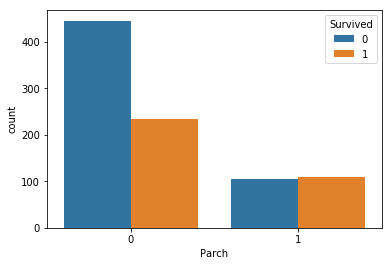

In [21]:
for dataset in data_df :
    dataset['Parch'] = dataset['Parch'].apply(lambda x : 0 if x == 0 else 1)
sns.countplot(x = 'Parch' , hue = 'Survived' ,data = train)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,3,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1,38.0,3,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",-1,26.0,2,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1,35.0,3,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,2,0,373450,8.0500,NaN,S,1


In [23]:
test['Fare'].fillna(test['Fare'].mean() , inplace = True)

In [24]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
train.loc[: , ['Fare' , 'Survived']].groupby('Survived').mean()

,Fare
Survived,
0,22.117887
1,48.395408


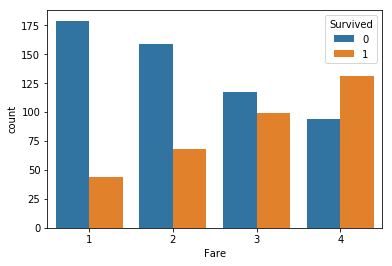

In [26]:
def fare(x) :
    if x < 7.92 :
        return 1 
    elif x < 14.46 :
        return 2
    elif x < 31 :
        return 3
    else :
        return 4
for dataset in data_df :
    dataset['Fare'] = dataset['Fare'].apply(fare)
sns.countplot(x = 'Fare' , hue = 'Survived' ,data = train)

In [27]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train['Embarked'].fillna('S' , inplace = True)

In [29]:
train['Embarked'].isnull().sum()

0

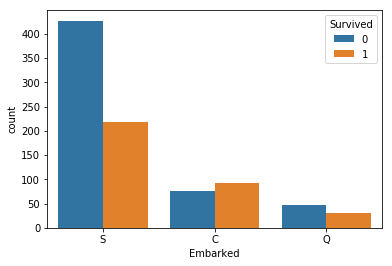

In [30]:
sns.countplot(x = 'Embarked' , hue = 'Survived' ,data = train)


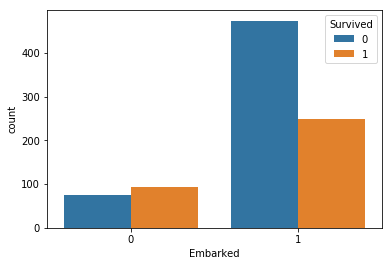

In [31]:
for dataset in data_df :
    dataset['Embarked'] = dataset['Embarked'].apply(lambda x : 0 if x == 'C' else 1)
sns.countplot(x = 'Embarked' , hue = 'Survived' ,data = train)

In [32]:
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for dataset in data_df :
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=True)
    dataset.replace({'Title': mapping}, inplace=True)
    for title in titles:
        age_to_impute = dataset.groupby('Title')['Age'].median()[titles.index(title)]
        dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == title), 'Age'] = age_to_impute
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,3,0,A/5 21171,1,NaN,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1,2,3,0,PC 17599,4,C85,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",-1,1,2,0,STON/O2. 3101282,2,NaN,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1,2,3,0,113803,4,C123,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,2,2,0,373450,2,NaN,1,1,Mr


In [34]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
X = train[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Fare' , 'Embarked' , 'Family_Size' ]].values
XX = test[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Fare' , 'Embarked' , 'Family_Size' ]].values
y = train['Survived'].values

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2 , random_state = 666)

In [36]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
Survived,,,,,,,,,
0,447.016393,2.531876,0.704918,1.320583,2.132969,0.189435,2.229508,0.863388,0.775956
1,444.368421,1.950292,-0.362573,1.277778,2.345029,0.318713,2.926901,0.728070,0.505848


# 应用KNN模型

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = [8]
algorithm = ['auto']
p = [1,2,3,4]
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors,
              'p' : p}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=3, scoring = "roc_auc")
gd.fit(X_train, y_train)
y_predict = gd.predict(XX)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
0.8628578319674759
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=1,
           weights='uniform')


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.6s finished


In [39]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_predict})
submission.to_csv('KNN-Model.csv' , index = False)